![Course title](./images/title.png)
<i> Alexey Bochkarev </i> | [🌐 www.bochkarev.io](https://www.bochkarev.io) | [✉ a@bochkarev.io](mailto:a@bochkarev.io)

**Discord:** `co05-как-учить-машины-простые-примеры-про-ml`


## A few org notes

- **Goal:** look into a few techniques to gain some confidence and get inspired to take a full-blown course.

- **Approach:** selected ML examples from scratch. One simple thing and one useful thing per technology 🤷

- **Course tech:** Jupyter Notebook + python, mirrored with `nbviewer` and `Google Colab`. 

# ⓪ Introduction
- ML → think 'data-driven' approaches.
<center>
    <img src="images/xkcd-ml-system.png" style="display:block; margin:auto">
    <b>Source:</b> <a href=https://xkcd.com/1838/> XKCD </a>
</center>

Let us start with something really simple, such as...

# ① Linear regression: part I. Thinking.

... aka drawing a good straight line across a cloud of points. Like this:

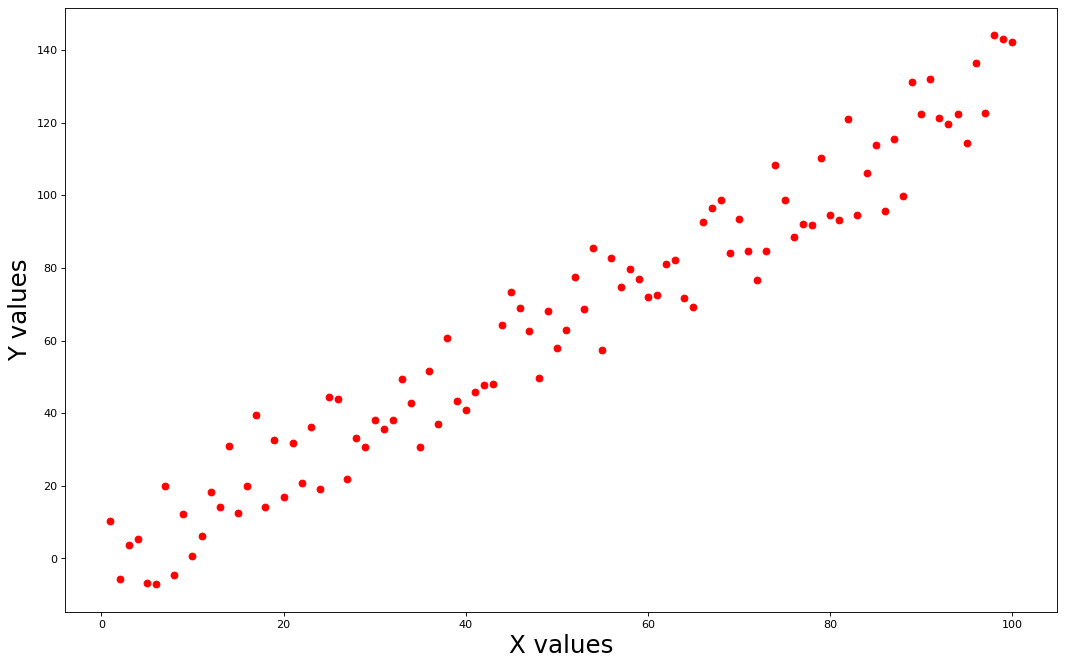

In [1]:
# Drawing a random 'cloud' of points
import numpy as np
import matplotlib.pyplot as plt

X = [x for x in range(1, 100 + 1)]
Y = [1.3*x + 35*(np.random.rand()-0.5) for x in X]

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X, Y, color='red')

# Decorations
plt.xlabel("X values", fontsize=22); plt.ylabel("Y values", fontsize=22)
plt.show()

## Okay, what is a *good line*?

So, we will **think** about our data as:
$$\LARGE {\color{blue} y_i}=\beta{\color{red} x_i} + {\color{green}\varepsilon_i}$$

<center><img src="./images/lin-reg.png" width=500px></center>

... so, we know the $x_i$ and $y_i$ and want to...

make these $\varepsilon_i$ as small as possible.

## Making $\varepsilon_i$ small
For the i-th point we have: $\varepsilon_i^2 = (y_i-\beta x_i)^2$

(why is it square, by the way?..)

So, the formal problem is:

$$\large (y_1-\beta x_1)^2 + (y_2-\beta x_2)^2 + (y_3-\beta x_3)^2 + \ldots + (y_N-\beta x_N)^2\rightarrow\min_\beta$$

\begin{align}
(y_1-\beta x_1)^2 + (y_2-\beta x_2)^2 + (y_3-\beta x_3)^2 + \ldots + (y_N-\beta x_N)^2 = \\
= (y_1^2 - 2y_1\beta x_1 + \beta^2x_1^2) + (y_2^2 - 2y_2\beta x_2 + \beta^2x_2^2) + \ldots = \\
= (y_1^2+y_2^2+y_3^2+\ldots) -2(y_1x_1+y_2x_2+y_3x_3+\ldots)\beta+(x_1^2+x_2^2+x_3^2+\ldots)\beta^2 =\\
a \beta^2 - 2b\beta + c,
\end{align}

where:
- $a=(x_1^2+x_2^2+x_3^2+\ldots)$,
- $b=(y_1x_1+y_2x_2+y_3x_3+\ldots)$,
- $c=(y_1^2+y_2^2+y_3^2+\ldots)$

\begin{align}
\LARGE
a \beta^2 - 2b\beta + c \rightarrow \min_\beta,
\end{align}

where:
- $a=(x_1^2+x_2^2+x_3^2+\ldots)$,
- $b=(y_1x_1+y_2x_2+y_3x_3+\ldots)$,
- $c=(y_1^2+y_2^2+y_3^2+\ldots)$

These $a$, $b$, and $c$ are just *known constants*. Moreover, $a>0$. So, how to find the answer?

Yeah, that's right. We just need to find bottom point of the parabola:

$$\LARGE \beta^* = b / a.$$

That is,
$$\LARGE \beta^* = \frac{x_1y_1 + x_2y_2 + \ldots + x_Ny_N}{x_1^2 + x_2^2 + \ldots + x_N^2}.$$

### Really?

Let us check this real quick...

In [2]:
b = sum([X[i] * Y[i] for i in range(len(X))])
a = sum([x**2 for x in X])
beta_star = b / a
beta_star

1.2953154492291432

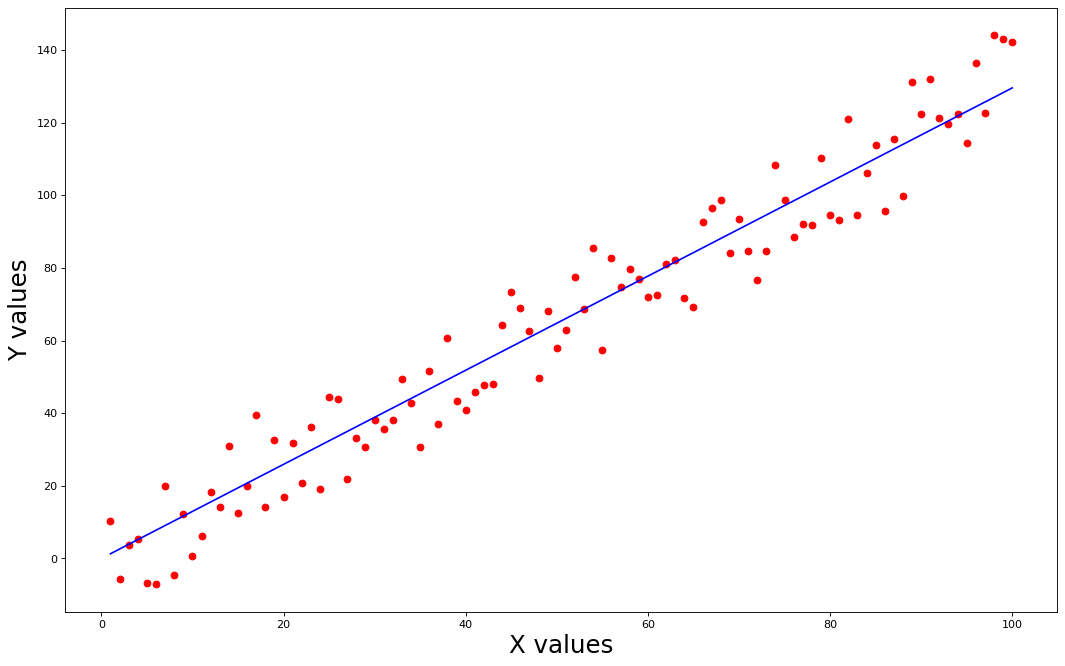

In [3]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X, Y, color='red')
plt.plot(X, [beta_star*x for x in X], color='blue')

# Decorations
plt.xlabel("X values", fontsize=22); plt.ylabel("Y values", fontsize=22)
plt.show()

### Sidenote:

This immediately suggests a quality ("loss") measure:

$$\Large\textrm{MSE}=\frac{(y_1-\beta x_1)^2 + (y_2-\beta x_2)^2 + \ldots + (y_N - \beta x_N)^2}{N}.$$

In [4]:
def loss(X, Y, beta):
    N = len(X)
    return (1/N)*sum([(Y[i]-beta*X[i])**2 for i in range(N)])

### Let's check how `loss` changes wrt $\beta$

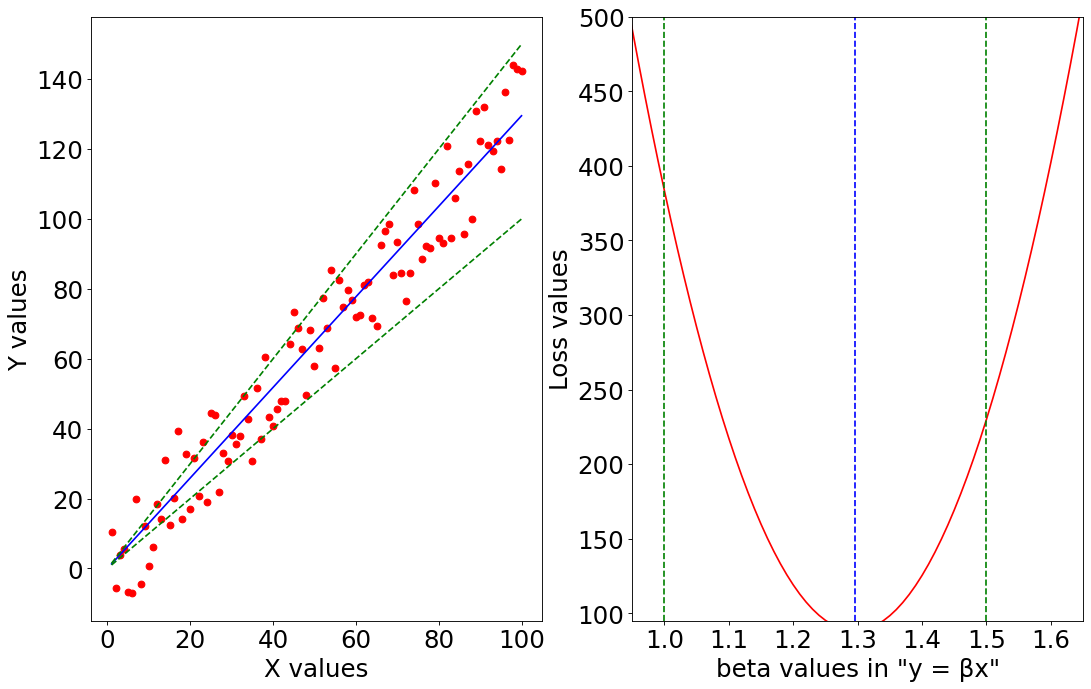

In [5]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

B = [0.01*j for j in range(200)]
LOSS = [loss(X,Y,beta) for beta in B]

beta1 = 1.0
beta2 = 1.5
plt.subplot(1,2,1)
plt.scatter(X, Y, color='red')
plt.plot(X, [beta_star*x for x in X], color='blue')
plt.plot(X, [beta1*x for x in X], color='green', linestyle='--')
plt.plot(X, [beta2*x for x in X], color='green', linestyle='--')

# Decorations
plt.xlabel("X values", fontsize=22); plt.ylabel("Y values", fontsize=22)
plt.xticks(fontsize=22); plt.yticks(fontsize=22)

plt.subplot(1,2,2)
plt.plot(B, LOSS, color='red')
plt.axvline(x=beta_star, linestyle='--', color='blue')
plt.axvline(x=beta1, linestyle='--', color='green')
plt.axvline(x=beta2, linestyle='--', color='green')
# Decorations
plt.gca().set(xlim=(0.95, 1.65), ylim=(95, 500))
plt.xlabel('beta values in "y = βx"', fontsize=22)
plt.ylabel('Loss values', fontsize=22)
plt.xticks(fontsize=22); plt.yticks(fontsize=22)

plt.show()

### Now, a black-box version...
... of the same deal (using `sklearn`):

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept = False)

X_train = np.array(X).reshape((-1,1))
Y_train = Y

regr.fit(X_train, Y_train)

print(f"Coefficient values:")
print(f"\__ got with sklearn: {regr.coef_[0]:.8f}")
print(f"\__ calc by hand    : {beta_star:.8f})")

Coefficient values:
\__ got with sklearn: 1.29531545
\__ calc by hand    : 1.29531545)


Note: that's a **predictive model**:

In [7]:
regr.predict([[110], [120], [130]])

array([142.48469942, 155.43785391, 168.3910084 ])

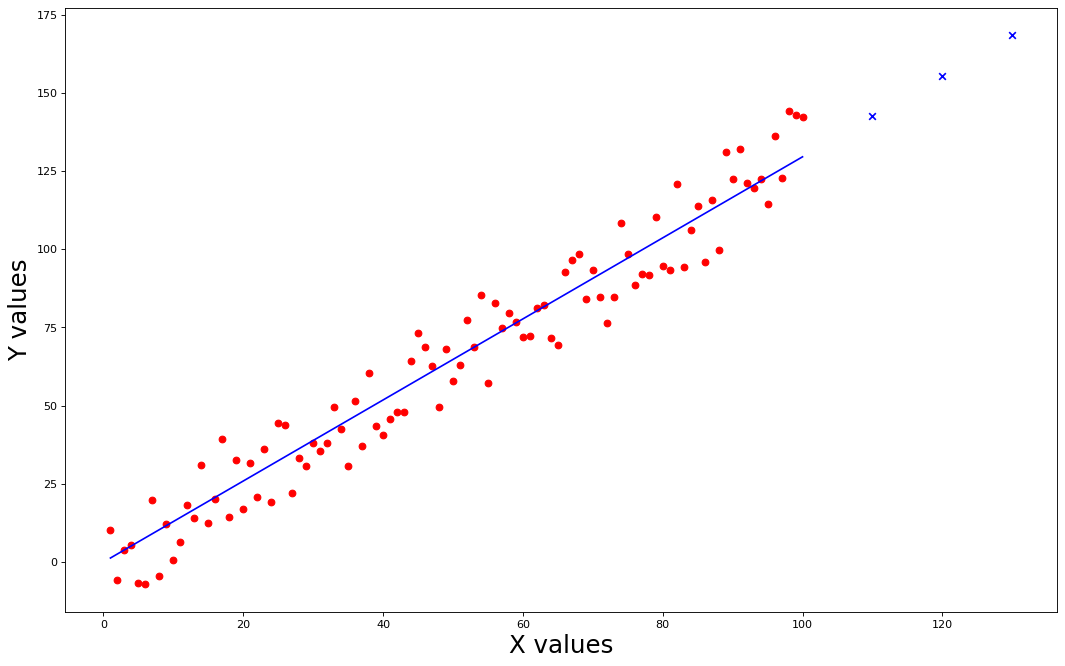

In [8]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X, Y, color='red')
plt.plot(X, [beta_star*x for x in X], color='blue')
# new values
X_new = [[110], [120], [130]]
Y_new = regr.predict(X_new)
plt.scatter(X_new, Y_new, color='blue', marker='x')

# Decorations
plt.xlabel("X values", fontsize=22); plt.ylabel("Y values", fontsize=22)
plt.show()

## What if I have many variables?

$$\LARGE \vec{y} = X\vec{\beta} + \vec{\varepsilon}$$

# >>> COMMERCIAL BREAK >>>

## LINEAR ALGEBRA course
...ask in your university...

Gilbert Strang's [intro](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/video_galleries/video-lectures/) to Linear Algebra is also a good place to start (English, MiT OCW).

![A screenshot](./images/strang.png)

Also, if you'd prefer to have it in RU: you could try searching [Лекции по Линейной Алгебре МФТИ в YouTube](https://www.youtube.com/results?search_query=%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F+%D0%B0%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0+%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8+%D0%BC%D1%84%D1%82%D0%B8+)

# ① Linear regression: Part II. Writing code.

## Let's prepare the data
This will be about wine -- see e.g. [Liquid Asset](http://www.liquidasset.com/index.html) for more info.

In [9]:
import pandas as pd

# source: http://www.liquidasset.com/index.html
wine = pd.read_csv("./wine-data.csv")

In [10]:
# info from the source:
# --------------------------------------------------------------------
# Dependent Variable:
#       LPRICE2    Logarithm of Average Vintage Price Relative to 1961
# --------------------------------------------------------------------
# Independent Variables:
# --------------------------------------------------------------------
#       Variable  DF     Label
#       WRAIN      1  Winter (Oct.-March) Rain  ML
#       DEGREES    1  Average Temperature (Deg Cent.) April-Sept.
#       HRAIN      1  Harvest (August and Sept.) ML
#       TIME_SV    1  Time since Vintage (Years)
wine.head(10)

,OBS,VINT,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
0,1,1952,-0.99868,600,17.1167,160,31
1,2,1953,-0.45440,690,16.7333,80,30
2,4,1955,-0.80796,502,17.1500,130,28
3,6,1957,-1.50926,420,16.1333,110,26
4,7,1958,-1.71655,582,16.4167,187,25
5,8,1959,-0.41800,485,17.4833,187,24
6,9,1960,-1.97491,763,16.4167,290,23
7,10,1961,0.00000,830,17.3333,38,22
8,11,1962,-1.10572,697,16.3000,52,21
9,12,1963,-1.78098,608,15.7167,155,20


In [11]:
X_train = wine[["WRAIN", "DEGREES", "HRAIN", "TIME_SV"]]
Y_train = wine[["LPRICE2"]]

So, we can get what they called a *Bordeaux equation*:

In [12]:
wreg = linear_model.LinearRegression()
wreg.fit(X_train, Y_train)

print(f"log(P) = {wreg.intercept_[0]:.3f}"+
      f" + {wreg.coef_[0][0]:.3f} WRAIN" +
      f" + {wreg.coef_[0][1]:.3f} DEGREES" +
      f" + {wreg.coef_[0][2]:.3f} HRAIN" +
      f" + {wreg.coef_[0][3]:.3f} TIME_SV")

log(P) = -12.145 + 0.001 WRAIN + 0.616 DEGREES + -0.004 HRAIN + 0.024 TIME_SV


### OK, but how to check it now? So many variables...

First, we can try to depict our $\varepsilon_i$:

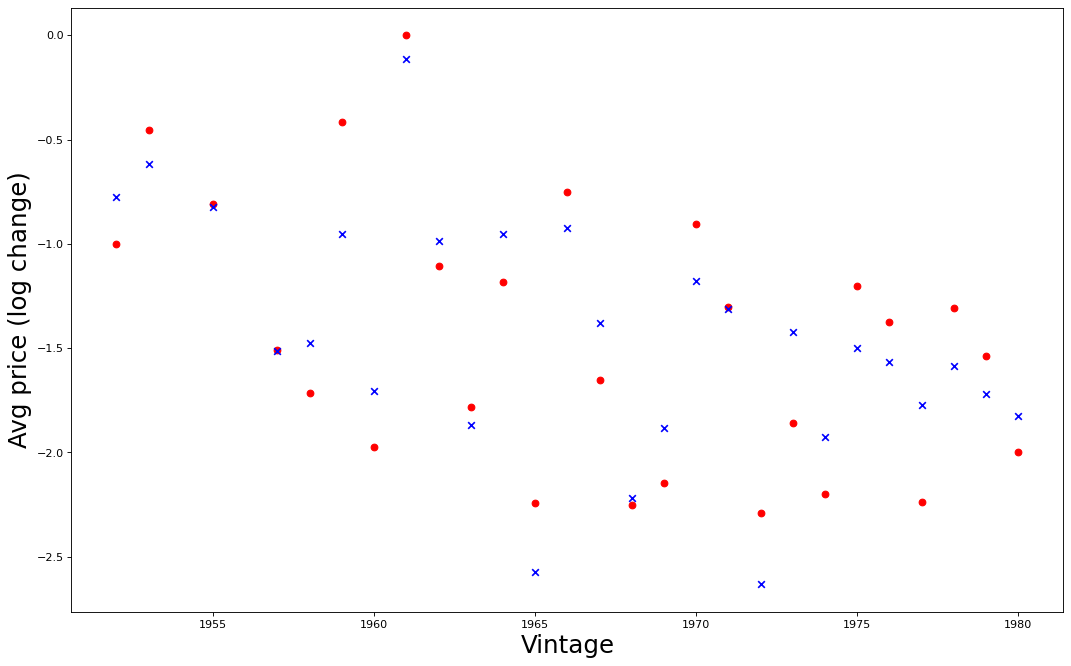

In [13]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(wine["VINT"], wine["LPRICE2"], color='red')
Y_pred = wreg.predict(X_train)

plt.scatter(wine["VINT"], Y_pred, color='blue', marker='x')
# Decorations
plt.xlabel('Vintage', fontsize=22)
plt.ylabel('Avg price (log change)', fontsize=22)
plt.show()

Sometimes people talk about $R^2$:

$$\LARGE R^2 = \frac{SS_{\textrm{avg}}- SS_{\textrm{pred}}}{SS_{\textrm{avg}}},$$
where:
- $SS_{\textrm{avg}} = (y_1-\bar{y})^2 + (y_2 - bar{y})^2 + \ldots$ and $\bar{y}=(y_1+y_2+\ldots)/N$ -- loss as if we just used the average $y$,
- $SS_{\textrm{pred}} = (y_1-\beta x_1)^2 + (y_2-\beta x_2)^2 +\ldots$ -- our loss associated with our estimate $\beta$.

### Important note:

`in-sample` vs `out-of-sample` assesments. Usually the dataset is split into:
- training set,
- validation set
- (usually) test set

Some more details about wine are in the original (pretty old) paper:
```
Orley Ashenfelter , David Ashmore & Robert Lalonde (1995) Bordeaux Wine
Vintage Quality and the Weather, CHANCE, 8:4, 7-14, DOI: 10.1080/09332480.1995.10542468
```
e.g., https://fairmodel.econ.yale.edu/ec438/ashen1.pdf

- This, and quite a few other examples are in the book *The Analytics Edge* (Bertsimas et al.).
- By the way, there is an awesome EdX course related to the book: https://www.edx.org/course/the-analytics-edge


## Example: a regression output

In [14]:
import statsmodels.api as sm

X_train_c = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_c)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LPRICE2   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     26.39
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           4.06e-08
Time:                        11:20:41   Log-Likelihood:                -1.7963
No. Observations:                  27   AIC:                             13.59
Df Residuals:                      22   BIC:                             20.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1453      1.688     -7.195      0.0

Finally: **please**, try to have a look whenever you can ("eyeballing models").

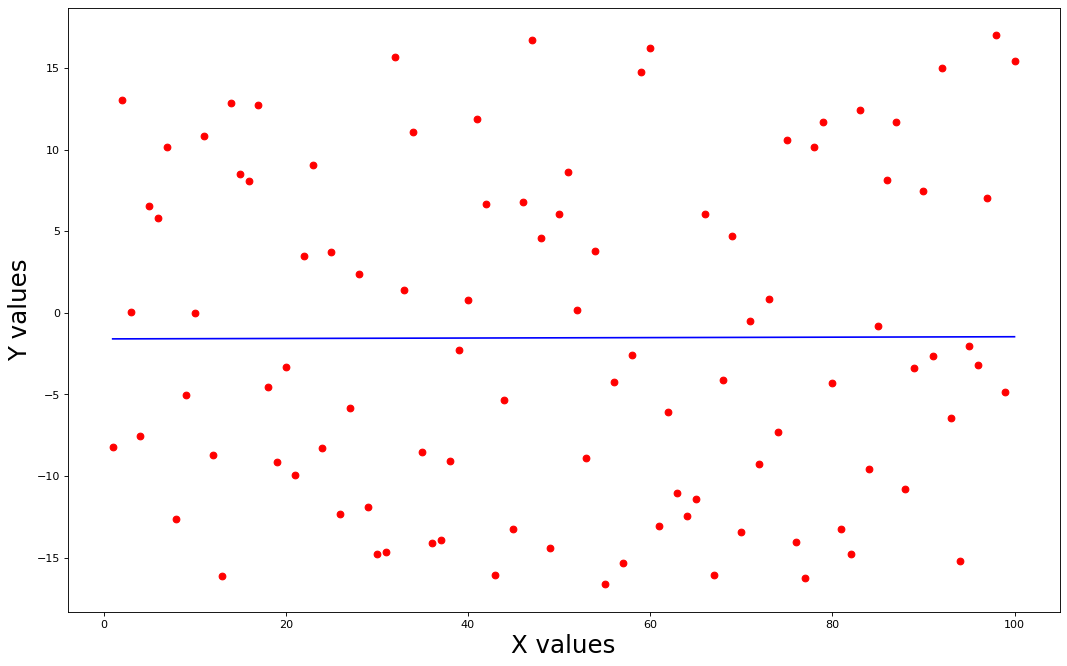

In [15]:
X = [x for x in range(1, 100 + 1)]
Y = [35*(np.random.rand()-0.5) for x in X]

Xp = sm.add_constant(X)

m2 = sm.OLS(Y, Xp)
res2 = m2.fit()

Yhat = [res2.params[0] + res2.params[1] * x for x in X]

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X, Y, color='red')
plt.plot(X, [yhat for yhat in Yhat], color='blue')

# Decorations
plt.xlabel('X values', fontsize=22); plt.ylabel('Y values', fontsize=22)
plt.show()

In [16]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.001412
Date:                Sat, 09 Jul 2022   Prob (F-statistic):              0.970
Time:                        11:20:42   Log-Likelihood:                -372.62
No. Observations:                 100   AIC:                             749.2
Df Residuals:                      98   BIC:                             754.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6043      2.045     -0.784      0.4

## Wrap-up

- We created a *predictive model*,
- which *learned* parameters *from the data*.
- Rougly speaking: under the hood, `ordinary least squares (OLS)` model is (a multi-dimensional analog of) finding the minimum of a parabola,
- but it does work well in surprisingly many practical settings.
- Building and evaluating such models, and choosing the best model is an art.
- Of course, there are libraries to automate many things (such as `statsmodels` and `sklearn`).